<a href="https://colab.research.google.com/github/YairShemer/deep_numerology/blob/master/deep_numerology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Numerology 
In this program we train a neural network to transelate an english word by its numerology value. 
From Wikipedia:
"...It is also the study of the numerical value of the letters in words, names, and ideas."  
For example, we can use the following dictionay (similar to hebrew (Gimatria):
a=1, b=2,...,j=10,k=20,...,s=100,t=200,z=800.  
For Example, the numerology value of the word "hello" is 133 since 8+5+30+30+60=133.


## Import dependencies

In [0]:
import tensorflow as tf
import numpy as np
import string

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

In [127]:
def string_vectorizer(strng, alphabet=string.ascii_lowercase):
    vector = [[0 if char != letter else 1 for char in alphabet] 
                  for letter in strng]
    return vector


letters_array = list(string.ascii_lowercase)
letter2num = {
    'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9,
    'j':10,'k':20,'l':30,'m':40,'n':50,'o':60,'p':70,'q':80,'r':90,
    's':100,'t':200,'u':300,'v':400,'w':500,'x':600,'y':700,'z':800
}
NUM_OF_TRAINIG_WORDS = 1000
LENGTH_OF_WORDS = 5
NUM_OF_EPOCHS = 500
# words = np.chararray((NUM_OF_TRAINIG_WORDS, LENGTH_OF_WORDS)) 
words_arr = []
words_onehot_arr = []
numerology_arr = np.zeros(NUM_OF_TRAINIG_WORDS,dtype=float)

for i in range(NUM_OF_TRAINIG_WORDS):
  curr_word = ''
  curr_word_onehot = []
  curr_word_numerology = 0
  for j in range(LENGTH_OF_WORDS):
    # words[i,:] = np.random.choice(letters_array,LENGTH_OF_WORDS,replace=True)
    curr_letter = np.random.choice(letters_array,1,replace=True)[0]
    curr_word += curr_letter
    curr_word_onehot.extend(string_vectorizer(curr_letter)[0])
    curr_word_numerology += letter2num[curr_letter]
  words_arr.append(curr_word)
  words_onehot_arr.append(np.asarray(curr_word_onehot,dtype=float))
  numerology_arr[i] = curr_word_numerology
words_onehot_arr = np.asarray(words_onehot_arr)
print(words_onehot_arr)
# words_arr = np.asarray(words_arr)
# print(words_arr)
# print(numerology_arr)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Create the model

### Build a layer

In [0]:
layer_0 = tf.keras.layers.Dense(units=1,input_shape=[LENGTH_OF_WORDS*len(letters_array)])

### Assemble layers into the model

In [0]:
model = tf.keras.Sequential([layer_0])

## Compile the model, with loss and optimizer functions

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

Train the model

In [0]:
history = model.fit(words_onehot_arr, numerology_arr, epochs=NUM_OF_EPOCHS, verbose=False)

## Display training statistics

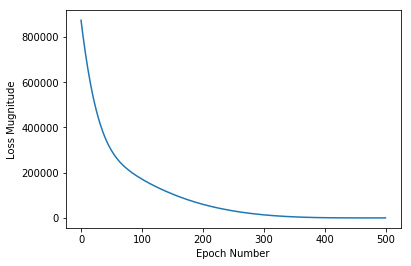

In [132]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Mugnitude')
plt.plot(history.history['loss'])

## Use the model to predict values

In [140]:
word = 'hello'
word_onehot = string_vectorizer(word)
word_onehot = np.asarray(word_onehot, dtype=float)
word_onehot = np.array([[item for sublist in word_onehot for item in sublist]])
print(model.predict(word_onehot))

[[133.45216]]
